## Machine Learning - Ex.1


Submitted by: Raz Gvili

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

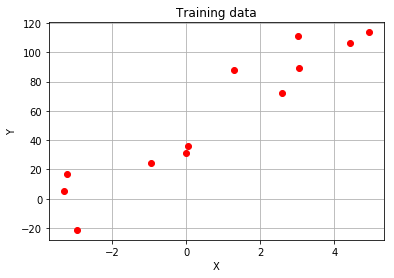

In [7]:
# generate the training data:

N = 12
x = np.random.random(N)*10-5
e = np.random.randn(N)*15
y = 15*x + 50 + e

plt.plot(x,y,'or')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training data')
plt.grid()
plt.show()

### Cost function visualization

The cost function $J(w_0,w_1)$ is defined as follows,

$$J(w_0,w_1)=\frac{1}{N}\sum_{i=1}^{N}{( w_0+w_1 x_i - y_i) ^2 }$$

Calculate $J(w_0,w_1)$ for the following parameters space:

$$ w_0 \in (0,100), w_1 \in (0,30)$$

Use a contour plot to visualize the result.

Tip: go over the `python_intro.ipynb` notebook.


In [8]:
def Inner_Per_Dot(dot_index_Training_data): 
    div = (1/float(N))
    Inner = (W0_x + (W1_y * x[dot_index_Training_data]) - y[dot_index_Training_data])
    return div*(Inner**2)

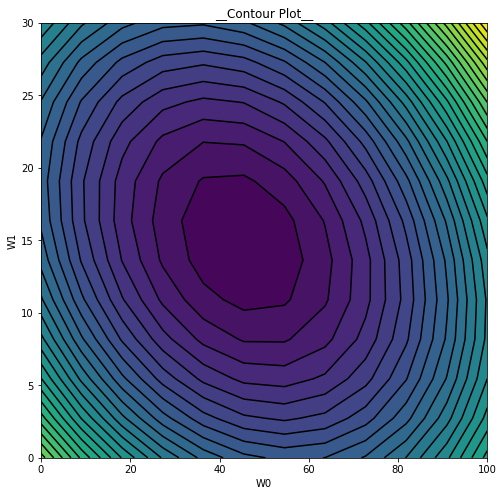

In [10]:
w0 = np.linspace(0, 100, N)
w1 = np.linspace(0, 30, N)

W0_x, W1_y = np.meshgrid(w0,w1)

Jsum = 0
for dot_index_Training_data in range(N):
    Jsum += Inner_Per_Dot(dot_index_Training_data) 
    
plt.figure(figsize=(8,8))
plt.contourf(W0_x, W1_y, Jsum, 30)
plt.contour(W0_x, W1_y, Jsum, 30, colors='black')

plt.title("__Contour Plot__")
plt.xlabel("W0")
plt.ylabel("W1")

plt.show()

### Gradient Descent

Implement the **gradient descent** algorithm and find the parameters $(w_0,w_1)$ that minimize the cost function.

Start from $w^{(0)}_0=0,w^{(0)}_1=0$ and iterate the algorithm for $T=100$ steps (or more if needed).

Verify that algorithm indeed converged by plotting the cost function $J(w^{(t)}_0,w^{(t)}_1)$ as a function of iteration $t=0,1,..,T$. 

(when showing graphs, make sure to add proper labels/titles to make it readable)

Tip: usually it's better to plot $\log(J)$ instead of $J$.


In [11]:
def step_gradient(curr_w0, curr_w1, learning_rate):
    w0_grad = 0
    w1_grad = 0 
    
    sum_w0 = 0
    sum_w1 = 0
    
    for dot_index_Training_data in range(0, N):
        sum_w0 += curr_w0 + (curr_w1 * x[dot_index_Training_data]) - y[dot_index_Training_data]
        sum_w1 += (curr_w0 + (curr_w1 * x[dot_index_Training_data]) - y[dot_index_Training_data]) * x[dot_index_Training_data]
        
    w0_grad = sum_w0 * (2/float(N))
    w1_grad = sum_w1 * (2/float(N))
    
    next_step_w0 = curr_w0 - (learning_rate * w0_grad)
    next_step_w1 = curr_w1 - (learning_rate * w1_grad)
    
    next_step = (next_step_w0, next_step_w1)
    
    return next_step

In [12]:
def gradient_descent(learning_rate, steps):
    w0_list = [0]
    w1_list = [0]
    step = (0,0)

    for i in range(steps):
        step = step_gradient(step[0], step[1], learning_rate)
        w0_list.append(step[0])
        w1_list.append(step[1])
    
    wo_w1_lists = w0_list, w1_list
    
    return wo_w1_lists

In [16]:
learning_rate = 0.025
steps = 100 

wo_w1 = gradient_descent(learning_rate, steps)

print('gradient_descent final results:')
print(wo_w1[0][-1])
print(wo_w1[1][-1])

gradient_descent final results:
44.72288376058532
14.874610303791409


### Visualize the path of the algorithm

Each iteration $t=1,..,T$ of the algorithm, results in a combination of the parameters: $w^{(t)}_0$ and $w^{(t)}_1$.

These combinations can be shown as a series of points in the parameters space $(w_0,w_1)$.

Plot again the cost function $J(w_0,w_1)$ and add on top of it, the series of points created by the algorithm. Verify that it indeed converged to the minimum of the cost function.

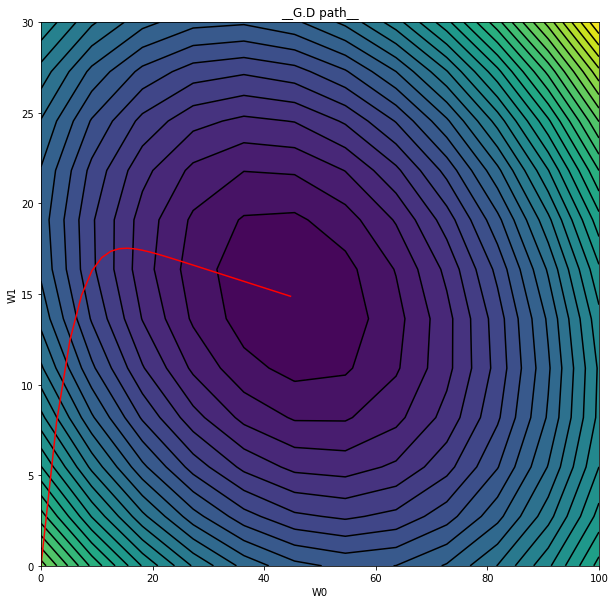

In [17]:
plt.figure(figsize=(10,10))
plt.contourf(W0_x, W1_y, Jsum, 30)
plt.contour(W0_x, W1_y, Jsum, 30, colors='black', linewidth=.5)

plt.plot(wo_w1[0],wo_w1[1],'red')
plt.title("__G.D path__")
plt.xlabel("W0")
plt.ylabel("W1")

plt.show()

### Linear regression

The gradient descent should have converged to linear regression solution:

$$ f(x) = w_0 + w_1 x$$

Plot the training data and add to the plot the linear function: $y=f(x)$. Verify that the result makes sense.

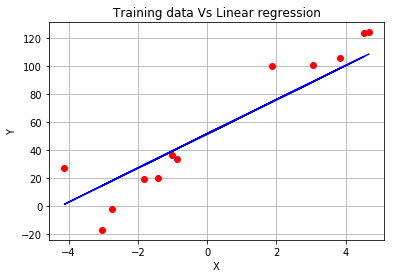

In [196]:
plt.plot(x,y,'or')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training data Vs Linear regression')
plt.grid()

y_ans = wo_w1[0][-1] + wo_w1[1][-1]*x

plt.plot(x, y_ans,'blue')


plt.show()

## Good luck !